In [2]:
from datasets import load_dataset
from datasets import Dataset
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq

egy_ds = load_dataset("QCRI/arabic_pos_dialect", "egy")
glf_ds = load_dataset("QCRI/arabic_pos_dialect", "glf")
lev_ds = load_dataset("QCRI/arabic_pos_dialect", "lev")
mgr_ds = load_dataset("QCRI/arabic_pos_dialect", "mgr")

In [3]:
# First, let's look at the data in a pandas DF
egy_df = egy_ds['train'].to_pandas()
glf_df = glf_ds['train'].to_pandas()
lev_df = lev_ds['train'].to_pandas()
mgr_df = mgr_ds['train'].to_pandas()


In [4]:
egy_df

,fold,subfold,words,segments,pos_tags
0,4,A,"[ليه, لما, تحب, حد, من, قلبك, يطلع, واطى, ليه,...","[ليه, لما, تحب, حد, من, قلب+ك, يطلع, واطى, ليه...","[PART, PART, V, NOUN, PREP, NOUN+PRON, V, ADJ,..."
1,4,A,"[عارف, بيقولك, ايه, "", إذا, أخطأت, فأحسن, "", ....","[عارف, ب+يقو+ل+ك, ايه, "", إذا, أخطأ+ت, ف+أحسن,...","[ADJ, PROG_PART+V+PREP+PRON, PART, PUNC, PART,..."
2,3,A,"[الحمد, لله, يا, جدعان, الفرسان, اللي, اتمسكوا...","[ال+حمد, ل+الله, يا, جدعان, ال+فرسان, اللي, ات...","[DET+NOUN, PREP+NOUN, PART, NOUN, DET+NOUN, PA..."
3,1,A,"[بحس, بشخصيتي, القوية, لما, اقول, لاخويا, اعمل...","[ب+حس, ب+شخصي+ت+ي, ال+قوي+ة, لما, اقول, ل+اخو+...","[PROG_PART+V, PREP+NOUN+NSUFF+PRON, DET+ADJ+NS..."
4,5,A,"[@ahmedabodsheesh, يا, باشا, دي, مش, محتاجه, د...","[@ahmedabodsheesh, يا, باشا, دي, مش, محتاج+ه, ...","[MENTION, PART, NOUN, PRON, PART, ADJ+NSUFF, N..."
...,...,...,...,...,...
345,1,B,"[وفي, لحظة, كدة, و, انت, قاعد, مع, ناس, بتضحك,...","[و+في, لحظ+ة, كدة, و, انت, قاعد, مع, ناس, ب+تض...","[CONJ+PREP, NOUN+NSUFF, ADV, CONJ, PRON, ADJ, ..."
346,5,B,"[اللى, بيقول, مش, هينتخب, حمدين, عشان, مش, هين...","[اللى, ب+يقول, مش, ه+ينتخب, حمدين, عشان, مش, ه...","[PART, PROG_PART+V, PART, FUT_PART+V, NOUN, PA..."
347,4,B,"[مفروض, ماتزعلش, عشان, في, ناس, حالها, اوحش, م...","[مفروض, ما+تزعل+ش, عشان, في, ناس, حال+ها, اوحش...","[ADJ, PART+V+NEG_PART, PART, PREP, NOUN, NOUN+..."
348,5,B,"[طب, إدونا, فرصة, نحط, فيشة, الكشاف, في, الكهر...","[طب, إد+و+نا, فرص+ة, نحط, فيش+ة, ال+كشاف, في, ...","[ADJ, V+PRON+PRON, NOUN+NSUFF, V, NOUN+NSUFF, ..."


In [5]:
glf_df

,fold,subfold,words,segments,pos_tags
0,2,B,"[@tagimlm77, @444Tf, هو, ثعلب, مكار, بعد, شوي,...","[@tagimlm77, @444Tf, هو, ثعلب, مكار, بعد, شوي,...","[MENTION, MENTION, PRON, NOUN, ADJ, NOUN, ADJ,..."
1,3,B,"[صدز, لاقال, ان, ريحة, العود, تنعنش, وياهي, تخ...","[صدز, لا+قال, ان, ريح+ة, ال+عود, تنعنش, و+يا+ه...","[NOUN, PART+V, PART, NOUN+NSUFF, DET+NOUN, V, ..."
2,1,B,"[لا, تفكرين, بالماضي, عشان, ما, تتضايقين, ولا,...","[لا, تفكر+ين, ب+ال+ماضي, عشان, ما, تتضايق+ين, ...","[PART, V+PRON, PREP+DET+NOUN, PART, PART, V+PR..."
3,4,B,"[@chanyol_, اي, والله, اعرف, وحده, كذا, لدرجه,...","[@chanyol_, اي, و+الله, اعرف, وحد+ه, كذا, ل+در...","[MENTION, PART, CONJ+NOUN, V, NOUN+NSUFF, ADV,..."
4,5,A,"[في, عآلم, الشعر, والأضوآء, والشهره, والوآقع, ...","[في, عآلم, ال+شعر, و+ال+أضوآء, و+الشهره, و+ال+...","[PREP, NOUN, DET+NOUN, CONJ+DET+NOUN, CONJ+NOU..."
...,...,...,...,...,...
345,1,B,"[@Ghazi_alsmiri, ياهلا, ومية, غلا, ،, ،, مساك,...","[@Ghazi_alsmiri, يا+هلا, و+مي+ة, غلا, ،, ،, مس...","[MENTION, PART+NOUN, CONJ+NUM+NSUFF, NOUN, PUN..."
346,3,A,"[اكثر, شي, جذبني, لوحة, السيارة, ههههه, رقم, ج...","[اكثر, شي, جذب+ني, لوح+ة, ال+سيار+ة, ههههه, رق...","[ADJ, NOUN, V+PRON, NOUN+NSUFF, DET+NOUN+NSUFF..."
347,3,B,"[دايما, الشخص, اللي, ينتقدك, كثير, حاول, يكون,...","[دايم+ا, ال+شخص, اللي, ينتقد+ك, كثير, حاول, يك...","[ADJ+CASE, DET+NOUN, PART, V+PRON, ADJ, V, V, ..."
348,1,B,"[ترى, لما, اكتب, تغريده, مو, يعني, اني, فاضيه,...","[ترى, لما, اكتب, تغريد+ه, مو, يعني, ان+ي, فاضي...","[PART, PART, V, NOUN+NSUFF, PART, V, PART+PRON..."


In [1]:
lev_df

NameError: name 'lev_df' is not defined

In [2]:
mgr_df

NameError: name 'mgr_df' is not defined

In [3]:
# Now, let's train a basic Seq2Seq Model. We take one sequence, and our output comes out
# on the other side. 

In [148]:
from datasets import Dataset


# First, we start with a Pretrained Model.
# It is AraT5v2.
model_name = "UBC-NLP/AraT5v2-base-1024"
tokenizer = AutoTokenizer.from_pretrained(model_name)
max_length = 128


# We take an example (segments, pos_tags)
def preprocess_example(example):
    model_inputs = tokenizer(
        example["segments"],
        max_length=max_length,
        truncation=True,
        is_split_into_words=True
    )

    labels = tokenizer(
        example["pos_tags"],
        max_length=max_length,
        truncation=True,
        is_split_into_words=True
    )
    
    # pad model_inputs, labels, attn_mask
    input_ids = np.pad(model_inputs["input_ids"],
                       (0, max_length - len(model_inputs["input_ids"])),
                       mode='constant')
    label_ids = np.pad(labels["input_ids"],
                       (0, max_length - len(labels["input_ids"])),
                       mode='constant')
    attn_mask = np.pad(model_inputs["attention_mask"],
                       (0, max_length - len(model_inputs["attention_mask"])),
                       mode='constant')

    # Return it in dictionary forms
    return {
        "input_ids": input_ids,
        "labels": label_ids,
        "attention_mask": attn_mask
    }

# Make a DF (350 x 3) of our data.
rows = [preprocess_example(ex) for ex in egy_ds["train"]]
df = pd.DataFrame(rows)


training_args = Seq2SeqTrainingArguments(
    output_dir="./seq2seq_output",           # Required: directory for saving model checkpoints
    num_train_epochs=1,                      # Total number of training epochs
    per_device_train_batch_size=2,           # Batch size per device during training
    per_device_eval_batch_size=2,            # Batch size for evaluation
    learning_rate=2e-5,                      # The initial learning rate
    weight_decay=0.01,                       # Strength of weight decay
    logging_dir="./logs",                    # Directory for storing logs
    predict_with_generate=True,              # Use generate to compute the evaluation metrics
    evaluation_strategy="steps",  			 # Evaluate every `eval_steps`
    eval_steps=500,
    use_mps_device=False
)



ds = Dataset.from_pandas(df.copy())

from transformers import AutoModelForSeq2SeqLM
import evaluate

model_name = "UBC-NLP/AraT5v2-base-1024"
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions = eval_pred.predictions
    label_ids = eval_pred.label_ids
    new_predictions = []
    new_label_ids = []
    for prediction in predictions:
        new_prediction = np.pad(prediction, (0, max_length - len(prediction)), mode='constant')
        new_predictions.append(new_prediction)
    for label_id in label_ids:
    	new_label_id = np.pad(label_id, (0, max_length - len(label_id)), mode='constant')
    	new_label_ids.append(new_label_id)
    new_predictions = np.array(new_predictions)
    new_label_ids = np.array(new_label_ids)
    return accuracy_metric.compute(predictions=new_predictions.flatten(), references=new_label_ids.flatten())


trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=ds,
    eval_dataset=ds,
    compute_metrics=compute_metrics
)

# Start training
trainer.train()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [124]:
stats = trainer.evaluate()
# TODO: FIX UP
# {'eval_loss': 5.768518924713135,
# 'eval_accuracy': 0.2711607142857143,
# 'eval_runtime': 166.6632,
# 'eval_samples_per_second': 2.1,
# 'eval_steps_per_second': 1.05,
# 'epoch': 1.0}
# stats


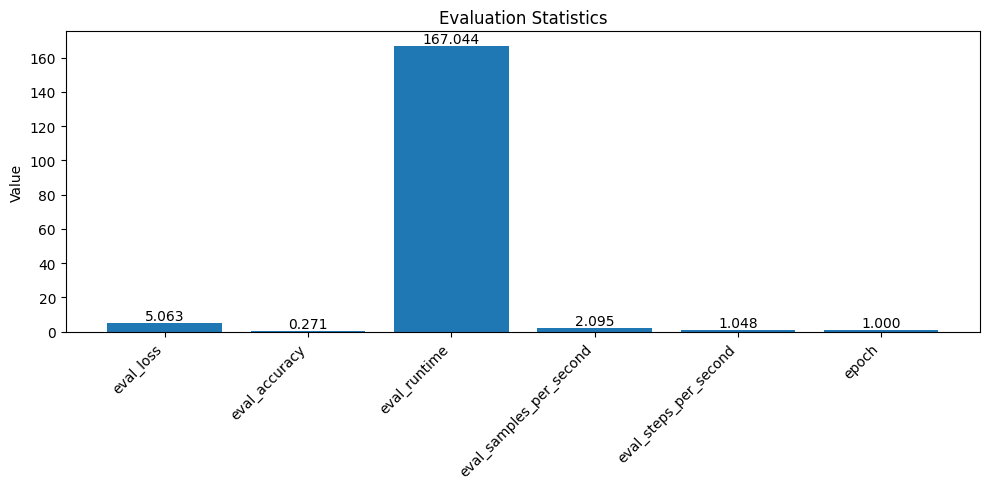

In [125]:
# Bar Plot
import matplotlib.pyplot as plt

labels = list(stats.keys())
values = list(stats.values())

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, values)

# Add labels on top of each bar
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{value:.3f}",
        ha='center',
        va='bottom'
    )

plt.xticks(rotation=45, ha='right')
plt.ylabel("Value")
plt.title("Evaluation Statistics")
plt.tight_layout()
plt.show()

In [149]:
from transformers import PreTrainedModel
from transformers.modeling_outputs import Seq2SeqLMOutput

# Now, we will experiment with custom architecture.
# This is an example of a basic, bare bones, neural network.


# Vocab size.
# There are ~44800 vocabulary words in arabic.
vocab_size = 44800

# 
# This is our custom Sequence2Sequence model. 
#
# The embeddings layers is first - there is
# no matric multiplication, but it maps our
# R^(1x128) input_ids to a R^(128x206) embeddings matrix
# (if we have up to 128 tokens, embeddings up to 206 for the hidden layer).
#
# The linear layer is a typical linear layer.
# W is a matrix R^(206x44800)
# b is a bias term, R^(44800).
# output = xW + b, R^(128x44800)
#
class MySeq2SeqModel(PreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.embed = nn.Embedding(vocab_size, 206)
        self.linear = nn.Linear(206, vocab_size)
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, input_ids=None, attention_mask=None, labels=None, **kwargs):
        x = self.embed(input_ids)
        logits = self.linear(x)
        loss = None
        if labels is not None:
            loss = self.loss_fn(
                logits.view(-1, vocab_size),
                labels.view(-1)
            )
        return Seq2SeqLMOutput(logits=logits, loss=loss)


# Define our training args.
training_args = Seq2SeqTrainingArguments(
    output_dir="./out",
    per_device_train_batch_size=1,
    gradient_accumulation_steps=1,
    fp16=False,               
    bf16=False,
    dataloader_pin_memory=False,
    dataloader_num_workers=0,
    predict_with_generate=False
)




In [150]:
# Now, we need to clean off our dataset for our custom model.
ds = Dataset.from_pandas(df.copy())
import torch

MAX_LEN = 128

def fix_dataset(batch):
    input_ids = []
    labels = []
    attention_mask = []

    for i in range(len(batch["input_ids"])):
        # input_ids
        ids = batch["input_ids"][i][:MAX_LEN]
        ids += [0] * (MAX_LEN - len(ids))
        input_ids.append(ids)

        # labels
        lab = batch["labels"][i][:MAX_LEN]
        lab += [0] * (MAX_LEN - len(lab))
        labels.append(lab)

        # attention_mask
        mask = batch["attention_mask"][i][:MAX_LEN]
        mask += [0] * (MAX_LEN - len(mask))
        attention_mask.append(mask)

    # Convert to tensors
    return {
        "input_ids": torch.tensor(input_ids, dtype=torch.long),
        "labels": torch.tensor(labels, dtype=torch.long),
        "attention_mask": torch.tensor(attention_mask, dtype=torch.long)
    }

ds = ds.map(fix_row, batched=True)
ds.set_format(type="torch", columns=["input_ids", "labels", "attention_mask"])

# print(ds[0]["input_ids"].shape)
# print(ds[0]["labels"].shape)          
# print(ds[0]["attention_mask"].shape)


trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=ds,
    eval_dataset=ds,
    compute_metrics=compute_metrics
)

trainer.train()

Map:   0%|          | 0/350 [00:00<?, ? examples/s]

Step,Training Loss


KeyboardInterrupt: 

In [74]:
# One option is to obtain predictions from the
# predictions method.
df_fixed = df.iloc[0:50]copy().reset_index(drop=True)
ds = Dataset.from_pandas(df_fixed, preserve_index=False)
ds = ds.map(fix_dataset, batched=True)
ds.set_format(type="torch", columns=["input_ids", "labels", "attention_mask"])
predictions = trainer.predict(ds)
predictions

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

PredictionOutput(predictions=(array([[[ 2.24499726e+00,  3.67912602e+00,  2.11355042e+00, ...,
          3.56623113e-01,  2.60196388e-01,  3.20772141e-01],
        [-6.39338064e+00,  2.58325434e+00,  4.69725561e+00, ...,
         -6.92879581e+00, -6.93278217e+00, -6.91557693e+00],
        [-1.12956572e+01,  2.98897672e+00,  3.98833990e+00, ...,
         -1.16057730e+01, -1.15919828e+01, -1.15701933e+01],
        ...,
        [ 2.86349854e+02, -1.81049690e+01, -4.86113968e+01, ...,
          2.65654510e+02,  2.65115479e+02,  2.65387238e+02],
        [ 2.86347198e+02, -1.80947399e+01, -4.85976868e+01, ...,
          2.65651825e+02,  2.65113312e+02,  2.65385162e+02],
        [ 2.86266327e+02, -1.80978146e+01, -4.85758209e+01, ...,
          2.65571960e+02,  2.65034851e+02,  2.65306976e+02]],

       [[ 2.28803182e+00,  4.21343851e+00,  2.92150998e+00, ...,
          4.03914630e-01,  3.05631906e-01,  3.72353137e-01],
        [-1.09501486e+01,  6.56614780e+00,  6.61931944e+00, ...,
        

(50, 3)


In [140]:
# Stats from our new trainer.
df_fixed = df.iloc[0:50].copy().reset_index(drop=True)
ds = Dataset.from_pandas(df_fixed, preserve_index=False)
ds = ds.map(fix_row, batched=True)
ds.set_format(type="torch", columns=["input_ids", "labels", "attention_mask"])
stats = trainer.evaluate(ds)

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

RuntimeError: Placeholder storage has not been allocated on MPS device!

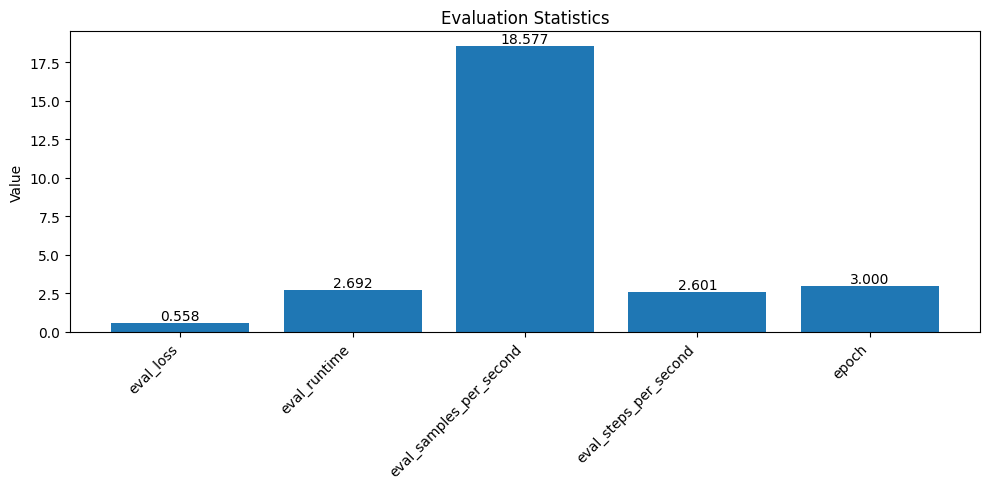

In [85]:
# Bar Plot
# We repeat from our first stats
import matplotlib.pyplot as plt

labels = list(stats.keys())
values = list(stats.values())

plt.figure(figsize=(10, 5))
bars = plt.bar(labels, values)

for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{value:.3f}",
        ha='center',
        va='bottom'
    )

plt.xticks(rotation=45, ha='right')
plt.ylabel("Value")
plt.title("Evaluation Statistics")
plt.tight_layout()
plt.show()

(350, 3)

In [129]:
# CPU only trainer.

import torch
model_cpu = trainer.model.to("cpu")

accuracy_metric = evaluate.load("accuracy")

padding_length = 130



cpu_args = Seq2SeqTrainingArguments(
   output_dir="./out",
   per_device_eval_batch_size=1,
   predict_with_generate=False,
   no_cuda=True               
)

cpu_trainer = Seq2SeqTrainer(
   model=model_cpu,
   args=cpu_args,
   eval_dataset=ds
)

# Clear any leftover MPS cache
if torch.backends.mps.is_available():
   torch.mps.empty_cache()



trainer.train()



    


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/training_args.py:1590: FutureWarning: using `no_cuda` is deprecated and will be removed in version 5.0 of 🤗 Transformers. Use `use_cpu` instead
  warnings.warn(


RuntimeError: Placeholder storage has not been allocated on MPS device!